Fala clã, neste notebook eu estarei fazendo minha primeira análise com a tabela do Campeonato Brasileiro série A 
entre os anos de 2009 a 2018, estou deixando abaixo a legenda e algumas perguntas que serão 
respondidas nesta análise.

=========================================================================================

Legenda:

* Posicao: Classificação final no campeonato brasileiro daquele ano. 
* Saldo: Saldo de gols do time, gols feitos - gols sofridos.
* Estrangeiros: Quantidade de estrangeiros daquele time.
* Valor_Total: Soma dos preços dos jogadores de um time naquela temporada.
* Media_Valor: Média dos preços dos jogadores de um time naquela temporada.

==========================================================================================



1. Os Times mais vitoriosos nos últimos 9 anos
2. Maior média de Gols Feitos por Temporada
3. Os Times menos vitoriosos nos últimos 9 anos
4. O Time que mais investiu em uma edição de campeonato dentro do período
5. Times com melhor ataque nos últimos anos
6. Defesa mais vazada
7. Os 5 maiores vencedores do campeonato





In [94]:
#Importando a biblioteca pandas e criando uma variável para receber o dataset em csv


import pandas as pd
v_dataset = pd.read_csv("../input/campeonato-braileiro-20092018/Tabela_Clubes.csv")

In [95]:
#Analisando o conjunto de dados 

v_dataset.head()

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN


In [96]:
#excluindo as últimas colunas 

v_dataset.drop(columns=["Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16"], inplace=True)


#p/estudo -> a função inplace=True valida a alteração p/o conjunto 

In [97]:
# renomeando algumas colunas

v_dataset.rename(columns={"Pos.":"Posição","Qtd_Jogadores":"Elenco","Valor_total":"Valor_Elenco","Media_Valor":"Media_Valor_Elenco"}, inplace=True)

In [98]:
# dividindo a coluna Gols F/S e acrescentando cada um em coluna diferente

divisao = v_dataset["GolsF/S"].str.split(":") #dividindo pelo delimitador ':'
#divisao.head()
gols_feitos = divisao.str.get(0) #pegando a pos 0 do que foi dividido e colocando em uma variavel
gols_sofridos = divisao.str.get(1) #pegando a pos 1 do que foi dividido e colocando em uma variavel

v_dataset["Gols_Feitos"] = gols_feitos # passando o resultado da variável para uma coluna
v_dataset["Gols_Sofridos"] = gols_sofridos 

v_dataset.drop(columns=["GolsF/S"], inplace=True) # excluindo a coluna Gols F/S pq ela foi dividida

v_dataset.head()

,Ano,Posição,Clubes,Vitorias,Derrotas,Empates,Saldo,Elenco,Idade_Media,Estrangeiros,Valor_Elenco,Media_Valor_Elenco,Gols_Feitos,Gols_Sofridos
0,2017,18,America-MG,10,10,18,-17,51,"24,8",0,27350000,536000,30,47
1,2017,7,Athletico-PR,16,9,13,17,52,24,3,37650000,724000,54,37
2,2017,6,Atletico-MG,17,8,13,13,50,"23,4",6,61350000,1230000,56,43
3,2017,11,Bahia,12,12,14,-2,48,"23,2",2,34900000,727000,39,41
4,2017,9,Botafogo,13,12,13,-8,45,"23,1",4,25550000,568000,38,46


In [99]:
#verificando o tipo dos campos
v_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ano                 200 non-null    int64 
 1   Posição             200 non-null    int64 
 2   Clubes              200 non-null    object
 3   Vitorias            200 non-null    int64 
 4   Derrotas            200 non-null    int64 
 5   Empates             200 non-null    int64 
 6   Saldo               200 non-null    int64 
 7   Elenco              200 non-null    int64 
 8   Idade_Media         200 non-null    object
 9   Estrangeiros        200 non-null    int64 
 10  Valor_Elenco        200 non-null    int64 
 11  Media_Valor_Elenco  200 non-null    int64 
 12  Gols_Feitos         200 non-null    object
 13  Gols_Sofridos       200 non-null    object
dtypes: int64(10), object(4)
memory usage: 22.0+ KB


In [100]:
#alterando os tipos de alguns campos

v_dataset["Valor_Elenco"] = v_dataset["Valor_Elenco"].astype("float32")
v_dataset["Media_Valor_Elenco"] = v_dataset["Valor_Elenco"].astype("float32")
v_dataset["Idade_Media"] = v_dataset["Valor_Elenco"].astype("float32")
v_dataset["Gols_Feitos"] = v_dataset["Gols_Feitos"].astype("int64")
v_dataset["Gols_Sofridos"] = v_dataset["Gols_Sofridos"].astype("int64")

v_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ano                 200 non-null    int64  
 1   Posição             200 non-null    int64  
 2   Clubes              200 non-null    object 
 3   Vitorias            200 non-null    int64  
 4   Derrotas            200 non-null    int64  
 5   Empates             200 non-null    int64  
 6   Saldo               200 non-null    int64  
 7   Elenco              200 non-null    int64  
 8   Idade_Media         200 non-null    float32
 9   Estrangeiros        200 non-null    int64  
 10  Valor_Elenco        200 non-null    float32
 11  Media_Valor_Elenco  200 non-null    float32
 12  Gols_Feitos         200 non-null    int64  
 13  Gols_Sofridos       200 non-null    int64  
dtypes: float32(3), int64(10), object(1)
memory usage: 19.7+ KB


In [101]:
# verificando dados estatisticos do conj

v_dataset.describe()


,Ano,Posição,Vitorias,Derrotas,Empates,Saldo,Elenco,Idade_Media,Estrangeiros,Valor_Elenco,Media_Valor_Elenco,Gols_Feitos,Gols_Sofridos
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.0,200.000000,200.0,200.0,200.000000,200.00000
mean,2012.500000,10.500000,13.855000,10.280000,13.855000,0.00000,43.23000,39252796.0,2.885000,39252796.0,39252796.0,46.920000,46.92000
std,2.879489,5.780751,3.967706,2.528551,4.187079,15.52725,9.47661,25233894.0,2.042704,25233894.0,25233894.0,10.234615,10.01675
min,2008.000000,1.000000,4.000000,3.000000,4.000000,-57.00000,20.00000,2350000.0,0.000000,2350000.0,2350000.0,18.000000,22.00000
25%,2010.000000,5.750000,11.000000,9.000000,11.000000,-9.00000,36.00000,17262500.0,1.000000,17262500.0,17262500.0,39.000000,40.00000
50%,2012.500000,10.500000,14.000000,10.000000,14.000000,-1.00000,43.00000,35050000.0,3.000000,35050000.0,35050000.0,47.500000,46.00000
75%,2015.000000,15.250000,16.000000,12.000000,17.000000,11.25000,50.00000,55312500.0,4.000000,55312500.0,55312500.0,53.000000,53.00000
max,2017.000000,20.000000,24.000000,17.000000,28.000000,40.00000,77.00000,115800000.0,8.000000,115800000.0,115800000.0,77.000000,79.00000


In [102]:
#a data está errada, por isso irei somar +1 ano no campo Ano

v_dataset["Ano"] = v_dataset["Ano"]+1

In [103]:
#checando o conj novamente
v_dataset.describe()

,Ano,Posição,Vitorias,Derrotas,Empates,Saldo,Elenco,Idade_Media,Estrangeiros,Valor_Elenco,Media_Valor_Elenco,Gols_Feitos,Gols_Sofridos
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.0,200.000000,200.0,200.0,200.000000,200.00000
mean,2013.500000,10.500000,13.855000,10.280000,13.855000,0.00000,43.23000,39252796.0,2.885000,39252796.0,39252796.0,46.920000,46.92000
std,2.879489,5.780751,3.967706,2.528551,4.187079,15.52725,9.47661,25233894.0,2.042704,25233894.0,25233894.0,10.234615,10.01675
min,2009.000000,1.000000,4.000000,3.000000,4.000000,-57.00000,20.00000,2350000.0,0.000000,2350000.0,2350000.0,18.000000,22.00000
25%,2011.000000,5.750000,11.000000,9.000000,11.000000,-9.00000,36.00000,17262500.0,1.000000,17262500.0,17262500.0,39.000000,40.00000
50%,2013.500000,10.500000,14.000000,10.000000,14.000000,-1.00000,43.00000,35050000.0,3.000000,35050000.0,35050000.0,47.500000,46.00000
75%,2016.000000,15.250000,16.000000,12.000000,17.000000,11.25000,50.00000,55312500.0,4.000000,55312500.0,55312500.0,53.000000,53.00000
max,2018.000000,20.000000,24.000000,17.000000,28.000000,40.00000,77.00000,115800000.0,8.000000,115800000.0,115800000.0,77.000000,79.00000


# **Os Times mais vitoriosos nos últimos 9 anos**

In [104]:
vitorias = v_dataset[{"Clubes","Vitorias"}] #separando duas colunas do dataset e armazenando na variavel vitorias
vitorias = vitorias.groupby("Clubes").sum() #somando esses campos e agrupando por clubes
vitorias = vitorias.sort_values("Vitorias", ascending = False) #ordenando o que foi feito anteriormente por vitorias

vitorias.head(5) #mostrando os 5 primeiros

,Vitorias
Clubes,
Gremio,170
Corinthians,170
Cruzeiro,169
Sao Paulo,164
Atletico-MG,163


# **Maior média de Gols por Temporada**

In [105]:
med = v_dataset[{"Ano","Gols_Feitos"}] # atribuindo os dois campos do resultado a uma variavel
med = med.groupby("Ano").mean().sort_values("Gols_Feitos", ascending = False).rename(columns={"Gols_Feitos": 
                                                                                             "Media_GP"})

#na segunda linha estou tirando a média dos gols feitos agrupando pelo ano e no fim renomeio a coluna de gols_feitos para media_gp


med

,Media_GP
Ano,
2009,54.70
2011,50.85
2010,48.90
2012,47.00
2013,46.80
2017,46.15
2016,45.60
2015,44.85
2014,43.00


# **Os Times menos vitoriosos nos últimos 9 anos**

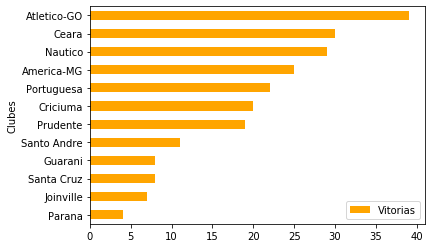

In [106]:
#Times menos vitoriosos (em gráfico)

graf_vit = v_dataset[{"Clubes","Vitorias"}] #tbm separei duas colunas do dataset em uma variavel 

#plotando um gráfico dos times menos vitoriosos no CB entre os anos
graf_vit = graf_vit.groupby("Clubes").sum().sort_values("Vitorias", ascending = True).head(12).plot(kind='barh', color="orange")



# **Os Times que mais investiram em uma única edição de campeonato dentro do período**

In [107]:
money = v_dataset[{"Clubes", "Ano", "Valor_Elenco"}] # separei algumas colunas para utilizar nesta análise
money = money[{"Clubes","Valor_Elenco","Ano"}].sort_values("Valor_Elenco", ascending = False) # fiz a análise ordenando de forma crescente

money.head()

,Ano,Clubes,Valor_Elenco
100,2013,Athletico-PR,115800000.0
137,2012,Sao Paulo,106900000.0
117,2013,Sao Paulo,103750000.0
136,2012,Santos,103650000.0
158,2011,Sao Paulo,97450000.0


# Times com melhor ataque nos últimos anos

In [108]:
pont = v_dataset[{"Ano","Clubes","Gols_Feitos"}] #escolhendo as três variáveis da análise
pont = pont.sort_values("Gols_Feitos", ascending = False) #ordenando a variável anterior pelo maior número de gols feitos

pont.head()

,Ano,Clubes,Gols_Feitos
107,2013,Cruzeiro,77
64,2015,Corinthians,71
171,2010,Gremio,68
88,2014,Cruzeiro,67
190,2009,Gremio,67


# **Defesa mais vazada**

In [109]:
defvas = v_dataset[{"Ano","Clubes","Gols_Sofridos"}] #assim como na análise anterior, separo os campos que vou utilizar
defvas = defvas.sort_values("Gols_Sofridos", ascending = False) #ordeno pelo maior número de gols sofridos

defvas.head()

,Ano,Gols_Sofridos,Clubes
113,2013,79,Nautico
144,2011,75,Avai
127,2012,72,Figueirense
198,2009,71,Sport
192,2009,71,Nautico


# **Os cinco maiores vencedores do campeonato**

In [110]:
win = v_dataset[{"Clubes","Posição"}] #separo as duas variáveis para análise 
win = win[win.Posição ==1].groupby("Clubes").count().sort_values("Posição",ascending = False).rename(
    columns={"Posição":"Títulos"})
#aqui eu conto quantas vezes um clube esteve em primeiro ordenando de forma crescente, no final eu renomeio a coluna posição para títulos

win



,Títulos
Clubes,
Corinthians,3
Cruzeiro,2
Fluminense,2
Palmeiras,2
Flamengo,1
